# 5. K-Means
#### 기본 중심점을 임의로 설정 하고 그걸 기준으로 군집화 후 중심점을 군집 내 중심점 이동을 계속 반복하여 움직이지 않는 중심점을 잡음 이렇게 cluster(군집)를 생성

### ☆ Random Initializaion Trap (중심점 무작위 선정 문제)
#### 만약 중심점의 위치를 너무 잘못 잡게 되면 군집 형성이 이상하게 설정 될 수 있음
#### 이를 위한 K-Means++ : 중심점 하나를 설정했을 때, 이 중심점과 가장 먼 거리의 데이터를 다음 중심점으로 설정

Elbow Method : K 개수의 설정 방법
K의 개수를 늘려갔을 때 중심점과의 평균 거리가 완만해지는 시점의 K값을 최적의 K값으로 지정

Euclidean Distance(유클리드 거리) = 피타고라스 정의를 이용한 거리 계산
Manhattan Distance(맨하튼 거리) = 격자를 두어 직각으로 이동하는 방식으로 거리 계산
Cosine Similarity(코사인 유사) = 데이터간의 각도를 0,0 으로부터 계산하여 cosine 각도가 작은 부분을 유사도가 높다고 판단

In [1]:
import os # 경고 대응
os.environ['OMP_NUM_THREADS'] = '1' 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [33]:
X = dataset.iloc[:, :].values
# X = dataset.values 상관 없음
# X = dataset.to_numpy() # 공식 홈페이지 권장
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

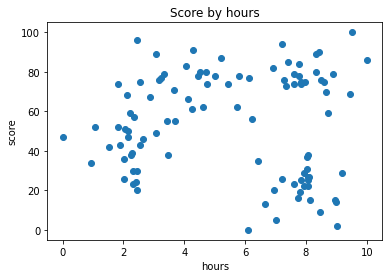

In [16]:
plt.scatter(dataset.hour, dataset.score, ) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)
##### 실제 거리를 따지기 힘들기 때문에 x축과 y축의 크기를 동일하게 설정

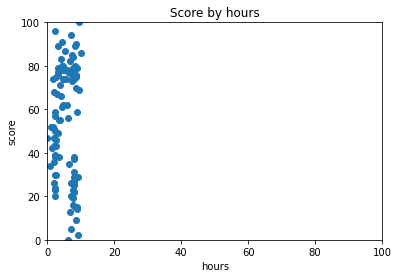

In [18]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]
# 평균이 0, 분산이 1인 값으로 변환(표준화->가우시안 정규 분포를 따름)

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

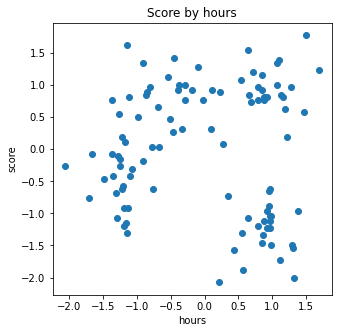

In [37]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()
#애초에 비지도 학습이므로 X값을 변경하여 범위만 따지도록 해도 됨

### 최적의 K 값 찾기 (엘보우 방식 Elbow Method)

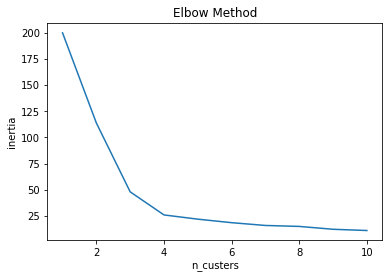

In [38]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터 중심(centroid) 까지의 거리의 제곱의 합
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_custers')
plt.ylabel('inertia')
plt.show()

### 최적의 K (4) 값으로 KMeans 학습

In [39]:
K = 4 # 최적의 K값

In [45]:
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# 최적의 K로 X를 학습시킴 + 어던 군집에 어떤 데이터가 들어가는지까지 확인 가능(fit_predict)

In [46]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 (최적의 K)

In [63]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

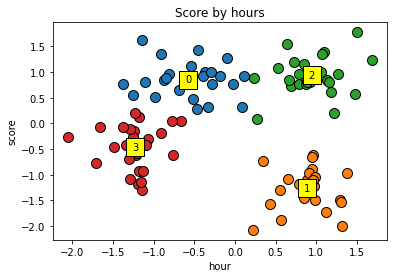

In [103]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s')
    plt.text(centers[cluster,0], centers[cluster, 1], cluster, va='center', ha='center')
# X[kmeans가 0인거의 hour값]

plt.title('Score by hours')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복)

In [105]:
X_org = sc.inverse_transform(X) # Feature Scalling 된 데이터를 다시 원복

In [106]:
centers_org = sc.inverse_transform(centers)

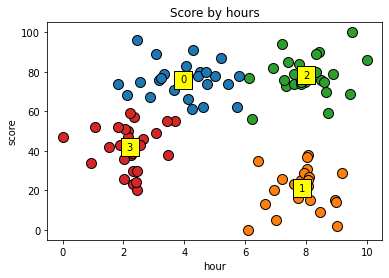

In [107]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s')
    plt.text(centers_org[cluster,0], centers_org[cluster, 1], cluster, va='center', ha='center')
# X[kmeans가 0인거의 hour값]

plt.title('Score by hours')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()